In [589]:
import numpy as np
import pandas as pd

In [590]:
df=pd.read_csv('energyData', sep='\t', header=[0], skiprows=[1])

<function matplotlib.pyplot.show>

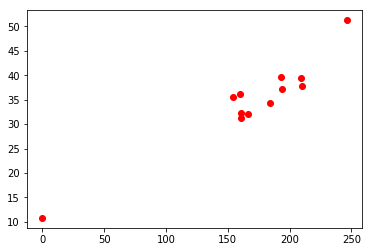

In [591]:
X=df.energy
y=df.cost
X_before=X
plt.plot(X, y, 'ro')
plt.show

In [592]:
#insert column of ones
ones=pd.DataFrame(1, index=np.arange(len(y)),columns=['a'])
X=np.array(pd.concat([ones, df['energy']],axis=1))
y=np.array(y.reshape(-1,1))

/Users/lohtipotnuru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [593]:
#feature scale data
def featureScale(vector):
    mean=np.mean(vector)
    vector=vector-mean
    std=np.std(vector, ddof=1)
    vector=np.true_divide(vector, std)
    return vector
X=featureScale(X)

In [594]:
#set variables
theta=np.array([[100],[10]])
alpha=0.1
iterations=150

In [595]:
def computeCost(X,y,theta):
    m=len(y)
    Z=np.dot(X,theta)-y
    J=(1/(2*m))*np.sum(np.square(Z))
    return J

In [596]:
def gradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=np.zeros(shape=(iterations,1))
    print(theta)
    for i in range(0,iterations):
        Z=np.dot(np.transpose(X),(np.dot(X,theta)-y))
        theta=theta-np.dot(np.divide(alpha,m),Z)
        J_history[i]=computeCost(X,y,theta)
    return theta, J_history

[[100]
 [ 10]]


<function matplotlib.pyplot.show>

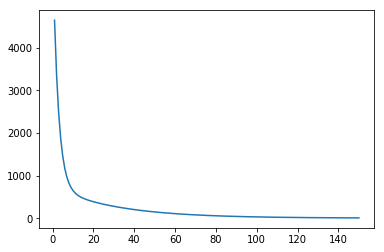

In [597]:
theta,J_history=gradientDescent(X,y,theta,alpha,iterations)
plotX=np.zeros(shape=(len(J_history),1))
for i in range(0,len(J_history)):
    plotX[i]=i+1
plt.plot(plotX,J_history)
plt.show

In [598]:
print(theta)

[[-18.69729342]
 [ 19.41118289]]


<function matplotlib.pyplot.show>

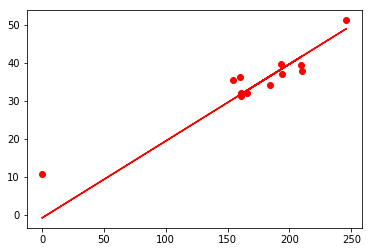

In [600]:
y2=np.dot(X,theta)
plt.plot(X_before, y2, '-r')
plt.plot(X_before,y,'ro')
plt.show